In [1]:
import torch
from memflow.phasespace.phasespace import PhaseSpace
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import LogNorm
import numpy as np
from  memflow.phasespace.utils import *
torch.set_default_dtype(torch.double)

2023-07-10 17:17:23.236746: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Using the phaspace library

In [2]:
E_CM = 13000
phasespace = PhaseSpace(E_CM, [21,21], [25,6,-6, 21])

In [3]:
ps_rand, momenta, weight, x1, x2 =  phasespace.generate_random_phase_space_points(50000)

Text(0.5, 0, 'log(rambo weights)')

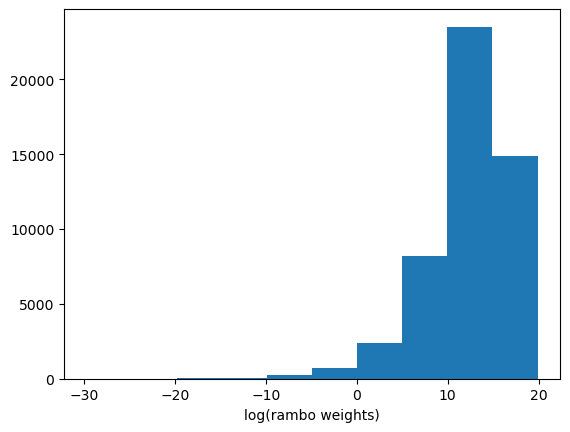

In [4]:
plt.hist(weight.log())
plt.xlabel("log(rambo weights)")

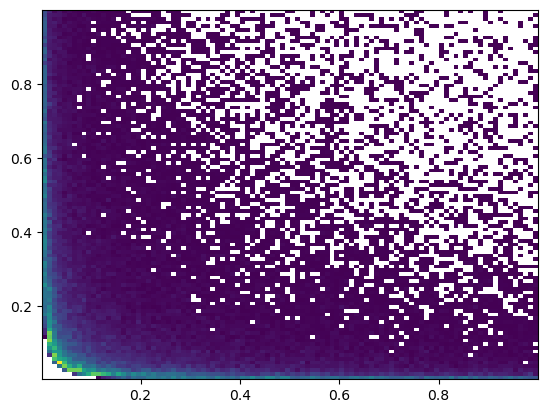

In [5]:
plt.hist2d(x1.numpy(), x2.numpy(), bins=100, cmin=1);

## From PS to momenta back to PS

In [10]:
ps_rand

tensor([[0.4725, 0.1909, 0.9473,  ..., 0.9920, 0.5902, 0.3077],
        [0.4223, 0.7698, 0.8302,  ..., 0.0918, 0.6950, 0.6478],
        [0.1739, 0.1060, 0.2859,  ..., 0.7612, 0.1729, 0.2596],
        ...,
        [0.4076, 0.3972, 0.4608,  ..., 0.8510, 0.5799, 0.5706],
        [0.5729, 0.0803, 0.2622,  ..., 0.1805, 0.7303, 0.4163],
        [0.6797, 0.3962, 0.0375,  ..., 0.4058, 0.8964, 0.5479]])

In [8]:
mom_v2, weight_v2, x1_v2, x2_v2 = phasespace.get_momenta_from_ps(ps_rand)
ps_v2 = phasespace.get_ps_from_momenta(mom_v2, x1_v2, x2_v2)

In [11]:
ps_v2

tensor([[0.2946, 0.6264, 0.9976,  ..., 0.2302, 0.5902, 0.3077],
        [0.2594, 0.3838, 0.9950,  ..., 0.7890, 0.6950, 0.6478],
        [0.2403, 0.7607, 0.9872,  ..., 0.6762, 0.1729, 0.2596],
        ...,
        [0.0588, 0.2068, 0.9907,  ..., 0.5390, 0.5799, 0.5706],
        [0.3191, 0.3723, 0.9947,  ..., 0.9262, 0.7303, 0.4163],
        [0.2516, 0.6410, 0.9995,  ..., 0.7698, 0.8964, 0.5479]])

In [12]:
ps_rand.shape

torch.Size([50000, 10])

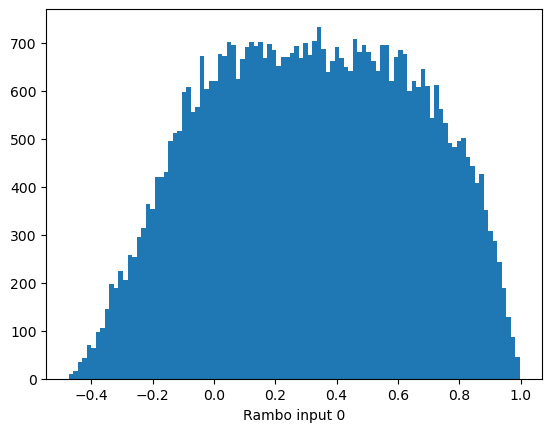

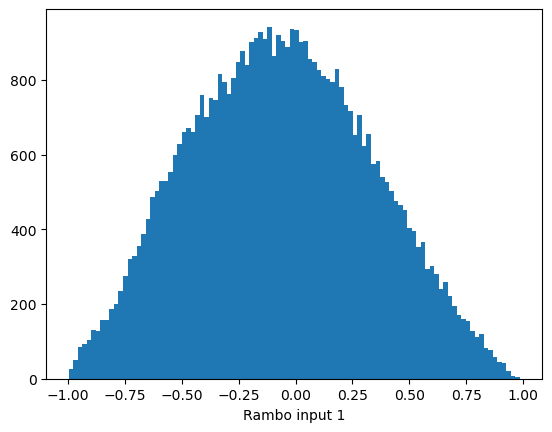

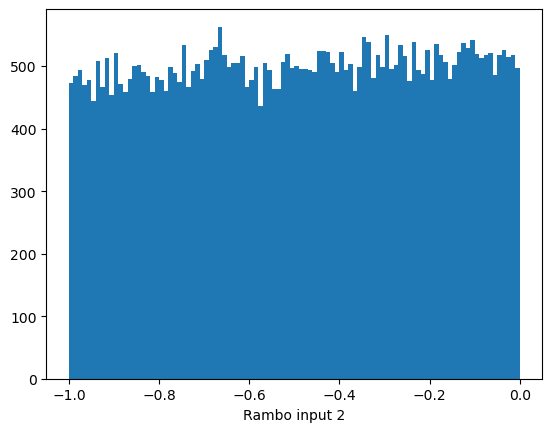

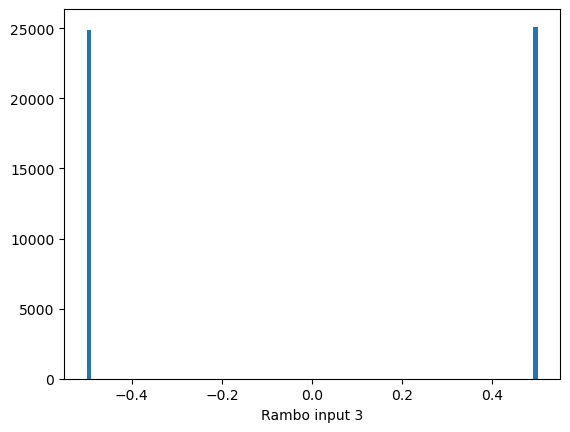

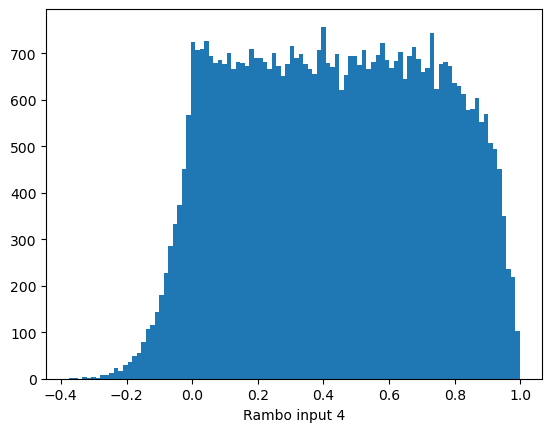

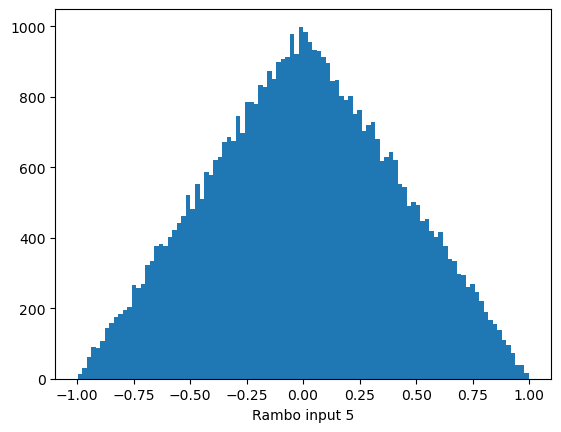

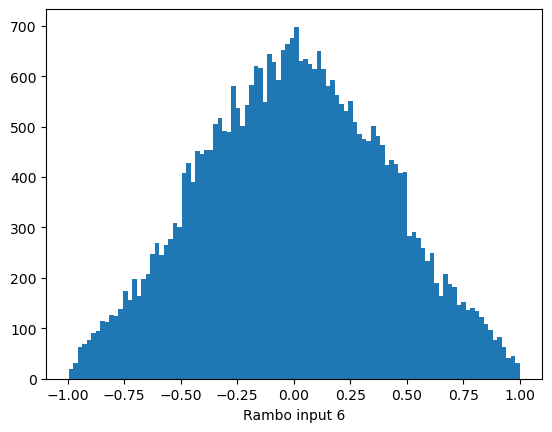

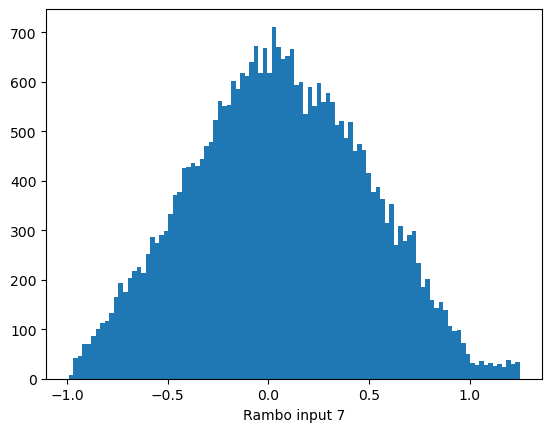

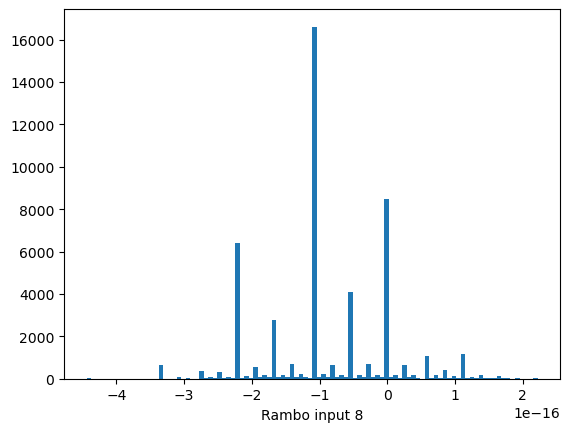

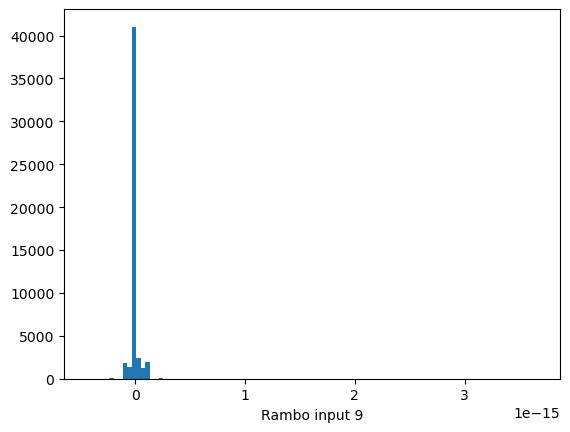

In [13]:
for i in range(10):
    plt.figure()
    plt.hist((ps_rand[:,i] - ps_v2[:,i]).flatten().numpy(), bins=100);
    plt.xlabel(f"Rambo input {i}")

## Testing from momenta to PS to momenta
Starting from parton, going to the hypercube and then back to partons. Check the numerical difference

In [47]:
momenta

tensor([[[ 513.2051,    0.0000,    0.0000,  513.2051],
         [ 513.2051,    0.0000,    0.0000, -513.2051],
         [ 290.8665,  145.8313,  172.4460,  133.8334],
         [ 374.3039, -171.0665, -280.8995,   46.6784],
         [ 285.8122,   58.8290,   50.0385, -214.4007],
         [  75.4275,  -33.5938,   58.4150,   33.8890]],

        [[ 524.6924,    0.0000,    0.0000,  524.6924],
         [ 524.6924,    0.0000,    0.0000, -524.6924],
         [ 387.0478,  -91.8682, -340.4296,   98.9259],
         [ 233.3488,   -6.9490,  130.0721,   87.9110],
         [ 370.4874,   58.6151,  233.7754, -222.3016],
         [  58.5008,   40.2021,  -23.4178,   35.4646]],

        [[ 430.0164,    0.0000,    0.0000,  430.0164],
         [ 430.0164,    0.0000,    0.0000, -430.0164],
         [ 187.3592, -106.4901,   78.5911,  -43.5801],
         [ 274.5464, -113.1342,  -92.8082, -155.5853],
         [ 285.4308,  108.7885,   34.4617,  196.7027],
         [ 112.6963,  110.8357,  -20.2446,    2.4627]],

    